### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline

### Loading Data

In [2]:
df = pd.read_csv('drug.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Data Cleaning

In [3]:
n_sex = n_BP = n_Cholesterol  = preprocessing.LabelEncoder()
df['Sex'] = n_sex.fit_transform(df['Sex'])
df['BP'] = n_BP.fit_transform(df['BP'])
df['Cholesterol'] = n_Cholesterol.fit_transform(df['Cholesterol'])
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


#### OR 

In [ ]:
# X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']].values
# X[0:5]

# n_sex = preprocessing.LabelEncoder()
# n_sex.fit(['F','M'])
# X[:,1] = n_sex.transform(X[:,1])
# n_BP = preprocessing.LabelEncoder()
# n_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
# X[:,2] = n_BP.transform(X[:,2])
# n_Cholesterol = preprocessing.LabelEncoder()
# n_Cholesterol.fit([ 'NORMAL', 'HIGH'])
# X[:,3] = n_Cholesterol.transform(X[:,3]) 
# X[0:5]

# k = pd.DataFrame(X,columns =['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'])
# k.head()

### Data Visualization 

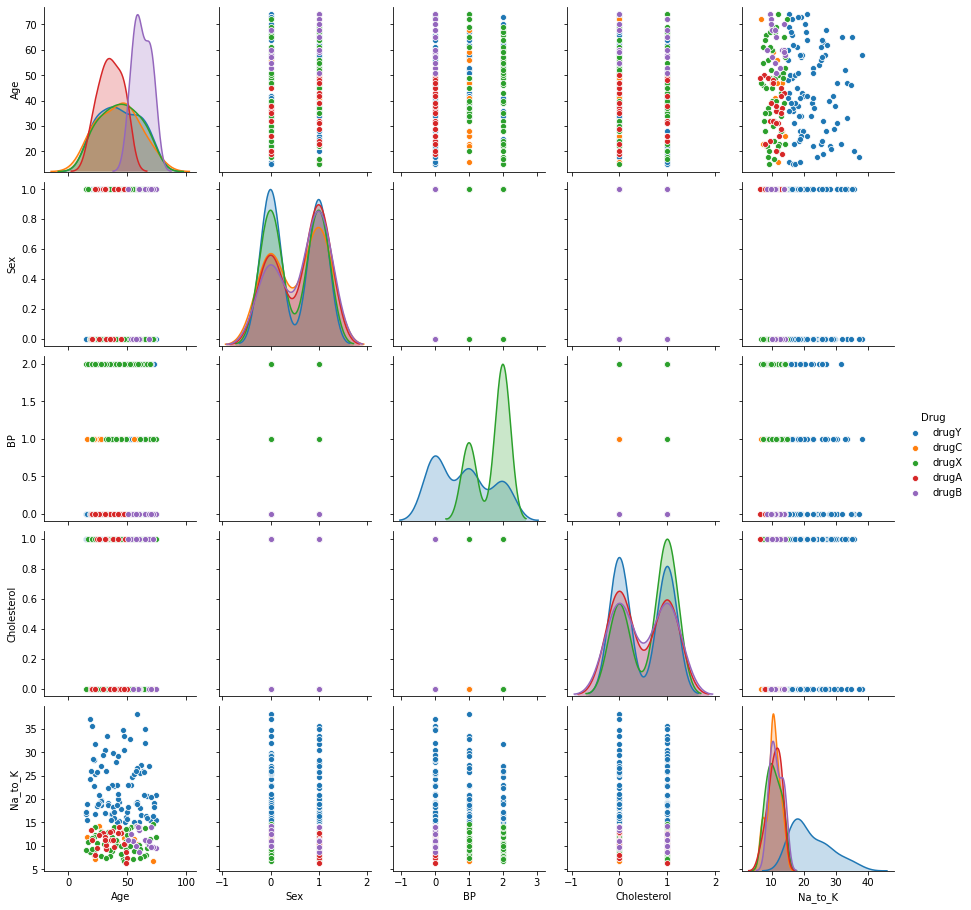

In [6]:
import seaborn as sns
import warnings
sns.pairplot(df,hue='Drug')
# warnings.filterwarnings("ignore")

### Feature and Lable set

In [7]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
Y = df['Drug'].values

In [8]:
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [9]:
Y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

### Data Normalization


In [10]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.29159102, -1.040833  , -1.11016894, -0.97043679,  1.28652212],
       [ 0.16269866,  0.96076892,  0.10979693, -0.97043679, -0.4151454 ],
       [ 0.16269866,  0.96076892,  0.10979693, -0.97043679, -0.82855818],
       [-0.988614  , -1.040833  ,  1.32976279, -0.97043679, -1.14996267],
       [ 1.0110343 , -1.040833  ,  0.10979693, -0.97043679,  0.27179427]])

### Train Test Split 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=3)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (140, 5) (140,)
Test set: (60, 5) (60,)


### Modeling

In [12]:
from sklearn.tree import DecisionTreeClassifier
d_t = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4) 
d_t.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Prediction 

In [13]:
prediction = d_t.predict(X_test)
print ("Prediction = ", prediction[:5])
print ("True Value = ", Y_test [:5])

Prediction =  ['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
True Value =  ['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


### Accuracy

In [14]:
print("Decision Tree Accuracy :", metrics.accuracy_score(Y_test, prediction))

Decision Tree Accuracy : 0.9833333333333333
